In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01/01/2016 21:11,01/01/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01/02/2016 1:25,01/02/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01/02/2016 20:25,01/02/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01/05/2016 17:31,01/05/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01/06/2016 14:42,01/06/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
df.shape

(1155, 7)

## Checking and solving Missing Values

In [5]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

START_DATE
START_DATE
False    1155
Name: count, dtype: int64

END_DATE
END_DATE
False    1155
Name: count, dtype: int64

CATEGORY
CATEGORY
False    1155
Name: count, dtype: int64

START
START
False    1155
Name: count, dtype: int64

STOP
STOP
False    1155
Name: count, dtype: int64

MILES
MILES
False    1155
Name: count, dtype: int64

PURPOSE
PURPOSE
False    653
True     502
Name: count, dtype: int64



In [6]:
df['PURPOSE'].fillna(method='ffill',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1853775989.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna(method='ffill',inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1853775989.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PURPOSE'].fillna(method='ffill',inplace=True)


## Converting date columns to datetime for time-based analysis

In [7]:
import datetime

In [8]:
def convert_time(START_DATE):
    y=[]
    for x in df[START_DATE]:
        y.append(datetime.datetime.strptime(x, "%m/%d/%Y %H:%M"))

    df[START_DATE] = y

In [9]:
def convert_time(END_DATE):
    t=[]
    for x in df[END_DATE]:
        t.append(datetime.datetime.strptime(x, "%m/%d/%Y %H:%M"))

    df[END_DATE] = t

In [10]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [11]:
# If it's not already datetime, convert once
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE']   = pd.to_datetime(df['END_DATE'])

In [12]:
# seperating the date and time and month and year
df['start_date'] = df['START_DATE'].dt.date
df['start_time'] = df['START_DATE'].dt.time
df['end_date'] = df['END_DATE'].dt.date
df['end_time'] = df['END_DATE'].dt.time
df['month'] = df['START_DATE'].dt.month
df['year'] = df['START_DATE'].dt.year

In [13]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
start_date    0
start_time    0
end_date      0
end_time      0
month         0
year          0
dtype: int64

In [14]:
# Convert start_time back to datetime.time and classify
def categorize_time(t):
    if t >= pd.to_datetime("05:00:00").time() and t < pd.to_datetime("12:00:00").time():
        return "Morning"
    elif t >= pd.to_datetime("12:00:00").time() and t < pd.to_datetime("17:00:00").time():
        return "Afternoon"
    elif t >= pd.to_datetime("17:00:00").time() and t < pd.to_datetime("21:00:00").time():
        return "Evening"
    else:
        return "Night"

df['time_of_day'] = df['start_time'].apply(categorize_time)


In [15]:
# Drop START_DATE and END_DATE
df.drop(['START_DATE','END_DATE'],axis=1,inplace=True)

In [16]:
df.head()

,CATEGORY,START,STOP,MILES,PURPOSE,start_date,start_time,end_date,end_time,month,year,time_of_day
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016,Night
1,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016,Night
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016,Evening
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016,Evening
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016,Afternoon


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CATEGORY     1155 non-null   object 
 1   START        1155 non-null   object 
 2   STOP         1155 non-null   object 
 3   MILES        1155 non-null   float64
 4   PURPOSE      1155 non-null   object 
 5   start_date   1155 non-null   object 
 6   start_time   1155 non-null   object 
 7   end_date     1155 non-null   object 
 8   end_time     1155 non-null   object 
 9   month        1155 non-null   int32  
 10  year         1155 non-null   int32  
 11  time_of_day  1155 non-null   object 
dtypes: float64(1), int32(2), object(9)
memory usage: 99.4+ KB


In [18]:
# create a new column for duration of the trip to be in minutes
df['end_dt'] = pd.to_datetime(df['end_time'], format='%H:%M:%S')
df['start_dt'] = pd.to_datetime(df['start_time'], format='%H:%M:%S')

# Calculate duration
df.loc[df['end_dt'] < df['start_dt'], 'end_dt'] += pd.Timedelta(days=1)
df['duration_minutes'] = (df['end_dt'] - df['start_dt']).dt.total_seconds() / 60 # in minutes

In [19]:
# convert miles to km
df['MILES'] = (df['MILES'] * 1.60934).map("{:.2f}".format)
df.rename(columns={'MILES': 'DISTANCE_KM'}, inplace=True)

In [20]:
df.head()

,CATEGORY,START,STOP,DISTANCE_KM,PURPOSE,start_date,start_time,end_date,end_time,month,year,time_of_day,end_dt,start_dt,duration_minutes
0,Business,Fort Pierce,Fort Pierce,8.21,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016,Night,1900-01-01 21:17:00,1900-01-01 21:11:00,6.0
1,Business,Fort Pierce,Fort Pierce,8.05,Meal/Entertain,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016,Night,1900-01-01 01:37:00,1900-01-01 01:25:00,12.0
2,Business,Fort Pierce,Fort Pierce,7.72,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016,Evening,1900-01-01 20:38:00,1900-01-01 20:25:00,13.0
3,Business,Fort Pierce,Fort Pierce,7.56,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016,Evening,1900-01-01 17:45:00,1900-01-01 17:31:00,14.0
4,Business,Fort Pierce,West Palm Beach,102.51,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016,Afternoon,1900-01-01 15:49:00,1900-01-01 14:42:00,67.0


In [21]:
df['start_time'] = pd.to_datetime(df['start_time'], format='%H:%M:%S')
df['end_time']   = pd.to_datetime(df['end_time'], format='%H:%M:%S')
df['DISTANCE_KM'] = df['DISTANCE_KM'].astype(float)

In [22]:
import calendar
df['Month'] = df['month'].map(lambda m: calendar.month_abbr[m])

In [34]:
# Drop month            
df.drop(['month'],axis=1,inplace=True)

In [35]:
df.describe()

,DISTANCE_KM,start_time,end_time,year,duration_minutes
count,1155.000000,1155,1155,1155.0,1155.000000
mean,17.005784,1900-01-01 15:10:53.662337792,1900-01-01 15:16:40.987013120,2016.0,23.243290
min,0.800000,1900-01-01 00:00:00,1900-01-01 00:00:00,2016.0,0.000000
25%,4.670000,1900-01-01 12:10:30,1900-01-01 12:23:30,2016.0,10.000000
50%,9.660000,1900-01-01 15:26:00,1900-01-01 15:44:00,2016.0,16.000000
75%,16.740000,1900-01-01 18:35:00,1900-01-01 18:48:00,2016.0,27.500000
max,499.380000,1900-01-01 23:55:00,1900-01-01 23:59:00,2016.0,336.000000
std,34.728114,NaN,NaN,0.0,27.318277


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CATEGORY          1155 non-null   object        
 1   START             1155 non-null   object        
 2   STOP              1155 non-null   object        
 3   DISTANCE_KM       1155 non-null   float64       
 4   PURPOSE           1155 non-null   object        
 5   start_date        1155 non-null   object        
 6   start_time        1155 non-null   datetime64[ns]
 7   end_date          1155 non-null   object        
 8   end_time          1155 non-null   datetime64[ns]
 9   month             1155 non-null   int32         
 10  year              1155 non-null   int32         
 11  time_of_day       1155 non-null   object        
 12  end_dt            1155 non-null   datetime64[ns]
 13  start_dt          1155 non-null   datetime64[ns]
 14  duration_minutes  1155 n

In [25]:
# Drop start_dt and end_dt            
df.drop(['start_dt','end_dt'],axis=1,inplace=True)

<Axes: xlabel='CATEGORY'>

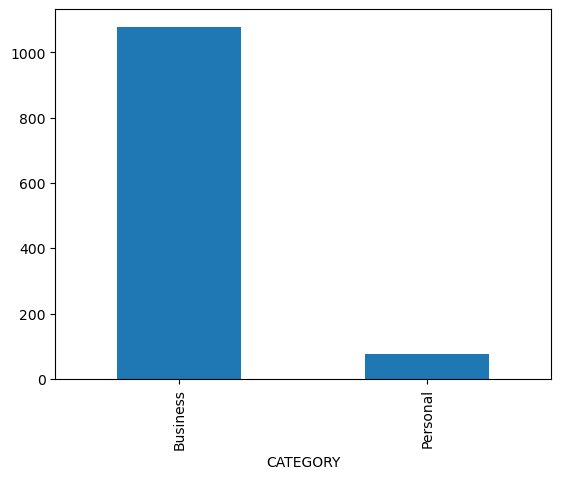

In [26]:
# plot number of trip at each category
df['CATEGORY'].value_counts().plot(kind='bar')

<Axes: xlabel='time_of_day'>

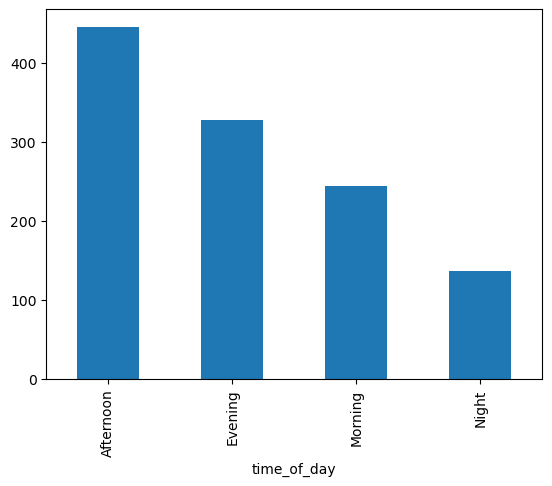

In [27]:
# plot number of trip at each time_of_day
df['time_of_day'].value_counts().plot(kind='bar')

<Axes: xlabel='PURPOSE'>

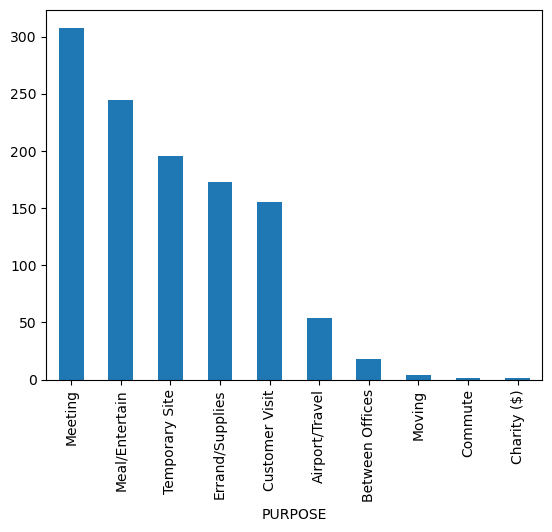

In [28]:
# plot number of trip at each PURPOSE
df['PURPOSE'].value_counts().plot(kind='bar')

<Axes: xlabel='time_of_day', ylabel='count'>

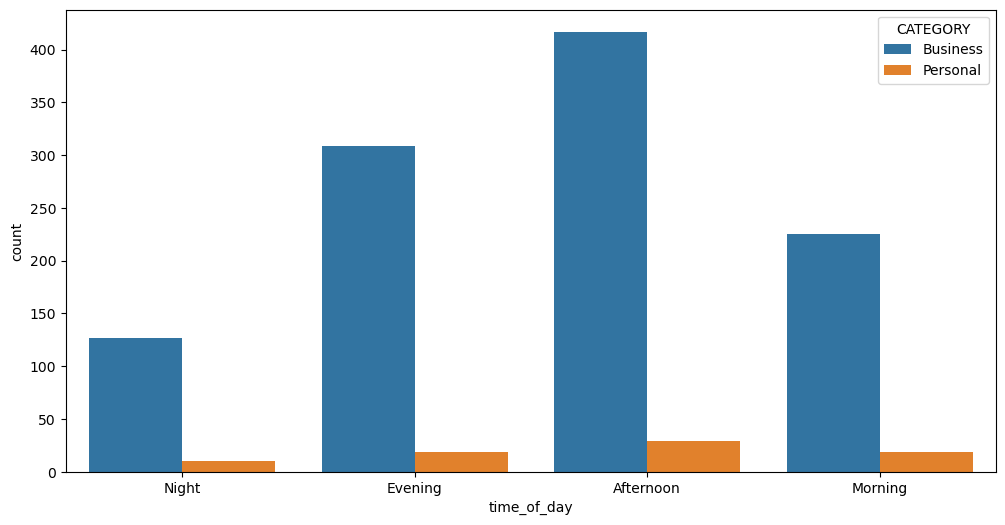

In [29]:
plt.figure(figsize = (12,6))
sns.countplot(x='time_of_day', data = df, hue = 'CATEGORY')

<Axes: xlabel='PURPOSE', ylabel='count'>

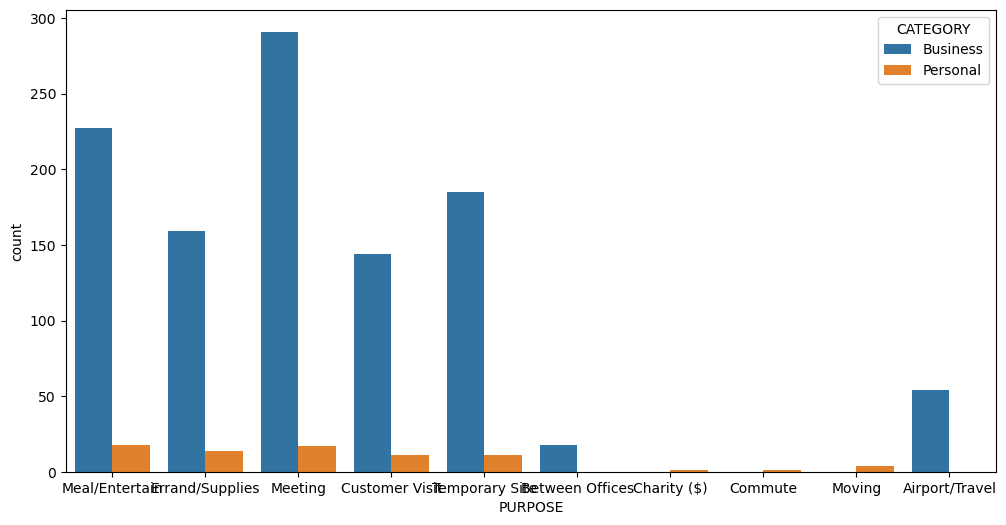

In [30]:
plt.figure(figsize = (12,6))
sns.countplot(x='PURPOSE', data = df, hue = 'CATEGORY')

In [36]:
df.to_csv("Uber_Rides_Edited.csv", index=False)

In [32]:
df['Month'].value_counts()

Month
Dec    146
Aug    133
Nov    122
Feb    115
Mar    113
Jul    112
Jun    108
Oct    106
Jan     61
Apr     54
May     49
Sep     36
Name: count, dtype: int64

In [37]:
df['DISTANCE_KM']

0         8.21
1         8.05
2         7.72
3         7.56
4       102.51
         ...  
1150      1.13
1151      6.28
1152     26.07
1153     10.30
1154     77.57
Name: DISTANCE_KM, Length: 1155, dtype: float64

In [38]:
df['START'].value_counts()

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Krendle Woods         1
Fuquay-Varina         1
Wake Co.              1
Katunayake            1
Gampaha               1
Name: count, Length: 177, dtype: int64